# Instructions

1.Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

8. Plot a correlation matrix, comment what you see.

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

10. Comment what you can see in the plots.

11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [1]:
#1.Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
#3.First look at its main features (head, shape, info). NOTE The target column is total_claim_amount
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#to see if we have null values
customer_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
#4.Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
#5.Change effective to date column to datetime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [8]:
#6.Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.
numericals_df = customer_df.select_dtypes(np.number)
numericals_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
#numericals_df['months_since_policy_inception'].unique()

In [10]:
#7.Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful.
#Store continuous data into a continuous_df variable and do the same for discrete_df

In [11]:
#this function categorizes columns in a DataFrame into continuous and discrite variables based on the number of unique values in each column.
#If the number of unique values in the coumn is greater than 100 the column is categorize as a continuous variable and if not, the columns is categorized as a discrete variable
def categorize_variables(dataframe):
    continuous = []
    discrete = []
    for column in dataframe.columns:
        if len(dataframe[column].unique()) > 100:
            continuous.append(column)
        else:
            discrete.append(column)
    return continuous, discrete

continuous_df, discrete_df = categorize_variables(numericals_df)

In [12]:
continuous_df

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

In [13]:
discrete_df

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

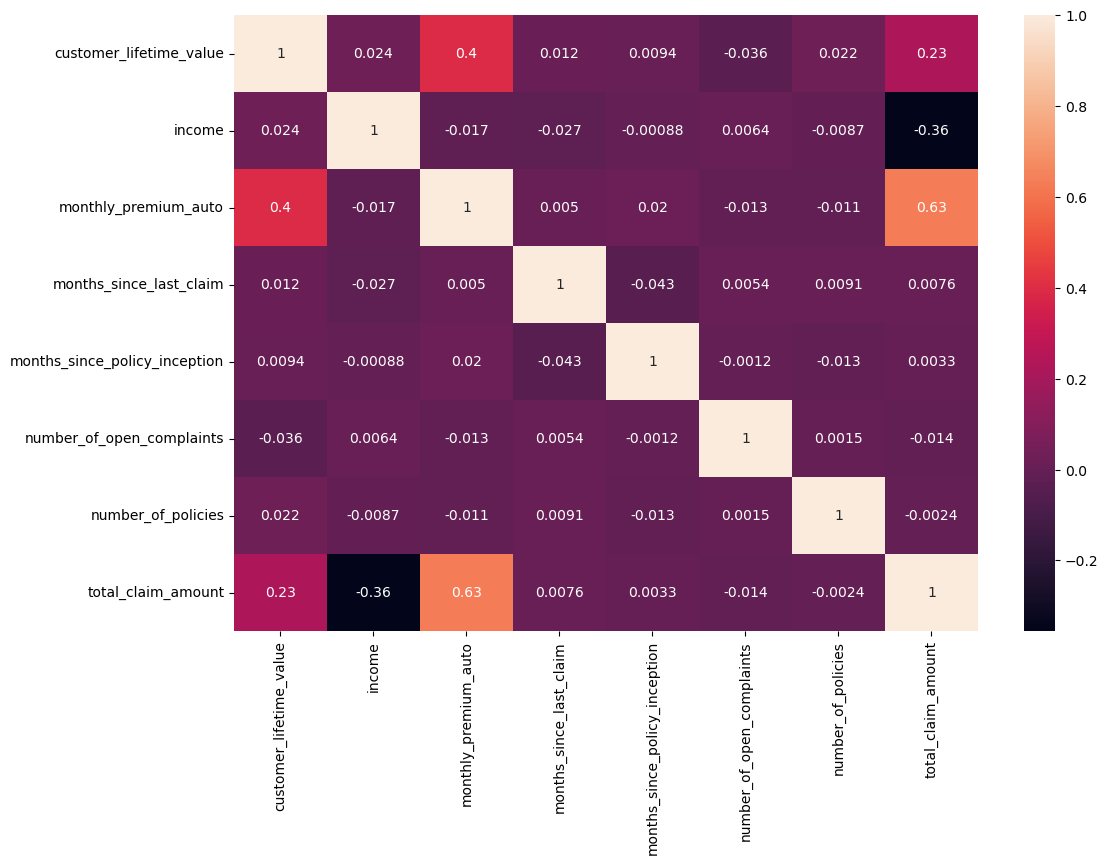

In [14]:
#8.Plot a correlation matrix, comment what you see.
correlation_matrix = numericals_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [15]:
#we don't have any high correlation (positive or negtive)

In [16]:
#9.Create a function to plot every discrete variable.
#Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

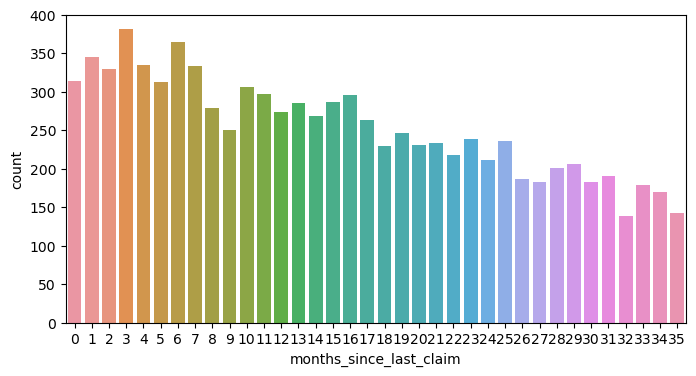

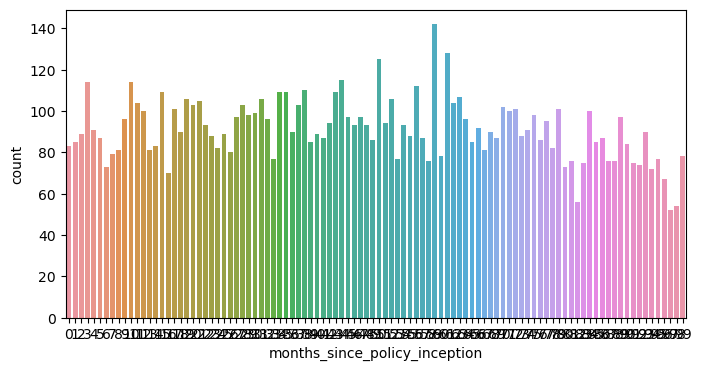

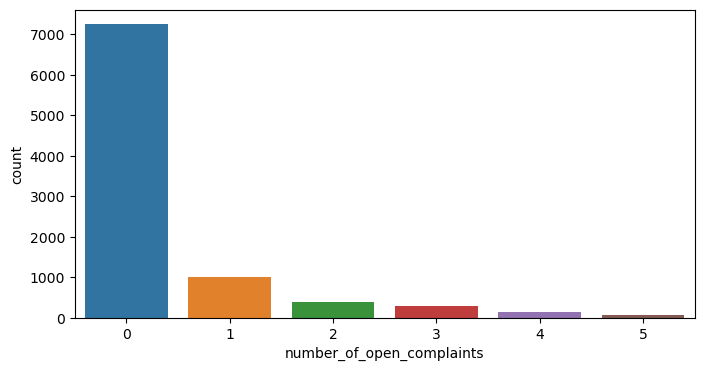

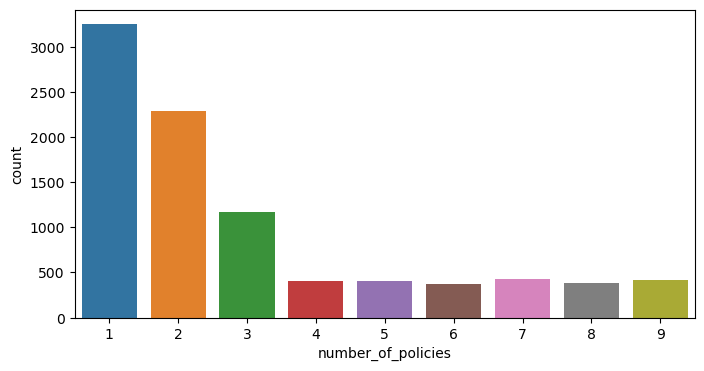

In [17]:
#Discrete variables
def plot_discrete_variables(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(x=column, data=dataframe)
        plt.show()
        
plot_discrete_variables(customer_df[discrete_df])

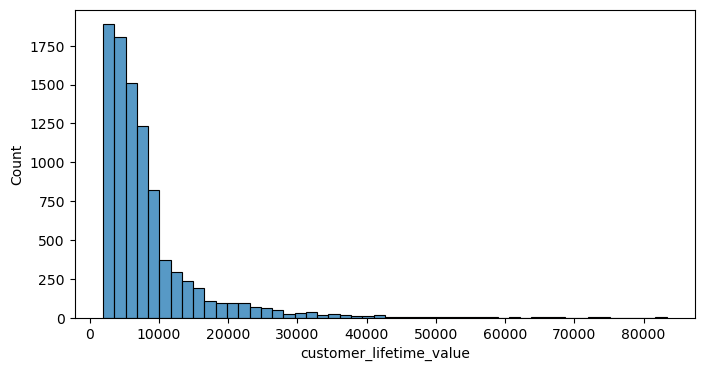

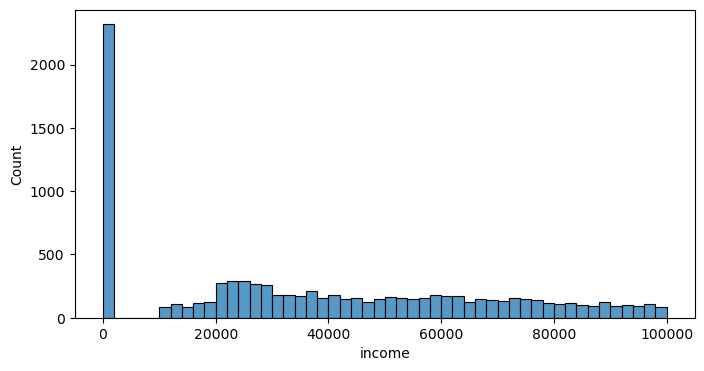

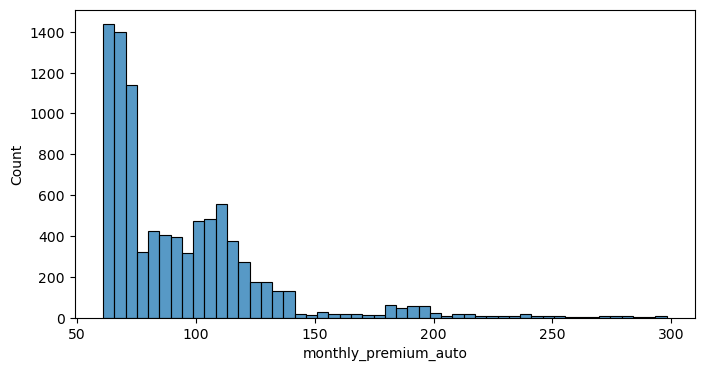

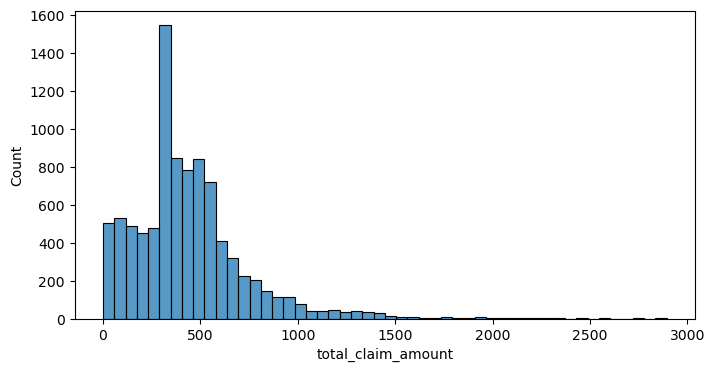

In [18]:
#Continues variables
def plot_continuous_variables(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(data=dataframe, x=column, bins=50)
        plt.show()
        
plot_continuous_variables(customer_df[continuous_df])

In [19]:
#10.Comment what you can see in the plots.
#In these plots we can see that we have many values concentrated on the left side

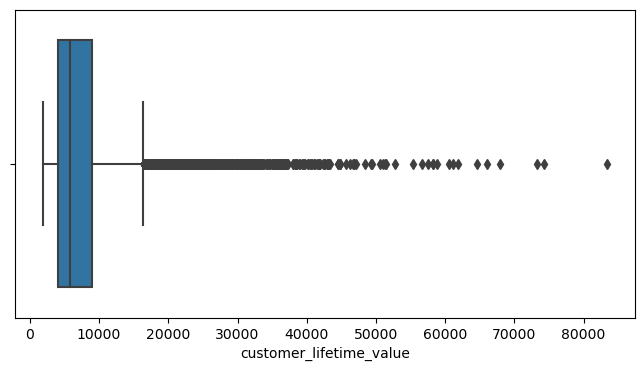

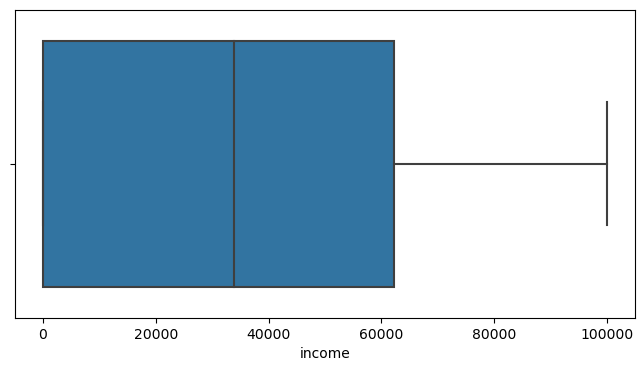

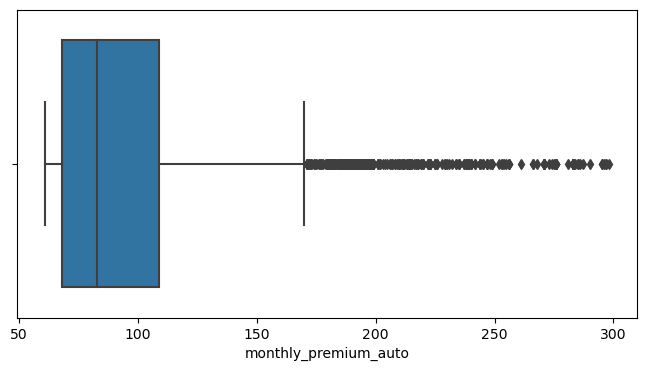

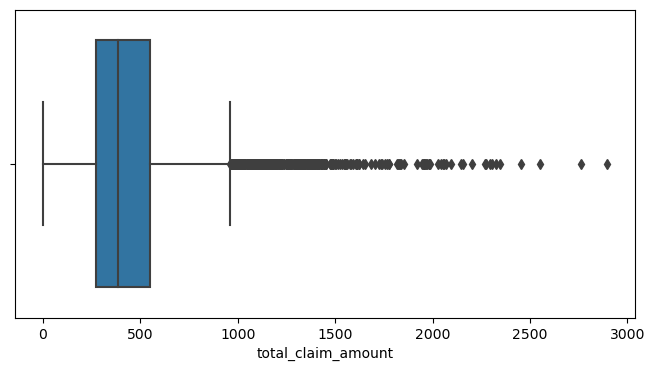

In [20]:
#11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
def plot_outliers(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=column, data=dataframe)
        plt.show()
        
plot_outliers(customer_df[continuous_df])

In [21]:
#12.Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.
#Also, remove them from your main dataframe.

In [22]:
iqr = np.nanpercentile(customer_df['customer_lifetime_value'],75) - np.nanpercentile(customer_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(customer_df['customer_lifetime_value'],75) + 1.5*iqr
print(iqr)
print(upper_limit)

extraordinary_points = customer_df[customer_df['customer_lifetime_value'] >200]
len(extraordinary_points)

4967.915247000001
16414.039911750002


9134

In [23]:
#I didnt find any outielrs. There are some values that are further away from the others in the total claim amount and in the customer lifetime value.
#total claim amoutn is our target so we don't change anything
#In the costumer lifetime value I will also not remove the outliers because there are many values that would be lost

In [24]:
customer_df['customer_lifetime_value'].value_counts(dropna=False)

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [25]:
#13.Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
missing_values = customer_df.isnull().sum()
missing_values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [26]:
#14.Save the numerical_df to csv as numerical.csv You will use this file again this week.
numericals_df.to_csv('numerical.csv', index=False)

# Instructions

1.Open the notebook created for Lab-cleaning-numerical-data.

2.Find all of the categorical data. Save it in a categorical_df variable.

3.Check for NaN values and decide what to do with them, do it now.

4.Check all unique values of columns.

5.Check dtypes. Do they all make sense as categorical data?

6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.

7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

10.Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [27]:
#2.Find all of the categorical data. Save it in a categorical_df variable.
categorical_df = customer_df.select_dtypes(include=['object'])
categorical_df 

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [28]:
#3.Check for NaN values and decide what to do with them, do it now.
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [29]:
#4.Check all unique values of columns.
for column in categorical_df.columns:
    print(f'Unique values for {column}: {categorical_df[column].unique()}')

Unique values for customer: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Unique values for state: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique values for response: ['No' 'Yes']
Unique values for coverage: ['Basic' 'Extended' 'Premium']
Unique values for education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values for employmentstatus: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique values for gender: ['F' 'M']
Unique values for location_code: ['Suburban' 'Rural' 'Urban']
Unique values for marital_status: ['Married' 'Single' 'Divorced']
Unique values for policy_type: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique values for policy: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values for renew_offer_type: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
Unique values for sales_channel: ['Agent' 'Call Center' 'We

In [30]:
#5.Check dtypes. Do they all make sense as categorical data?
#yes, I think they do

In [31]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [32]:
#6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.

#Clean the renew_offer_type column: we just want the number
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('Offer', '', regex=True)
#Clean the policy column: we just want the number
categorical_df['policy'] = categorical_df['policy'].str.extract('(\d+)')

In [33]:
categorical_df 

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


In [34]:
#7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
#we can combine some categories of cars, which basically mean the same
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].replace(['Luxury SUV', 'Sports Car', 'Luxury Car'], 'Luxury Car')
categorical_df ['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury Car'], dtype=object)

In [35]:
#8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
policy_type_count = categorical_df['policy_type'].value_counts()
print(policy_type_count)

policy_counts = categorical_df['policy'].value_counts()
print(policy_counts)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
3    4588
2    2881
1    1665
Name: policy, dtype: int64


In [36]:
policy_types = categorical_df['policy_type'].unique()
for policy_type in policy_types:
    print(f'Policy Type: {policy_type}')
    policy_type_subset = categorical_df[categorical_df['policy_type'] == policy_type]
    policy_counts = policy_type_subset['policy'].value_counts()
    print(policy_counts)
    print('\n')

Policy Type: Corporate Auto
3    1014
2     595
1     359
Name: policy, dtype: int64


Policy Type: Personal Auto
3    3426
2    2122
1    1240
Name: policy, dtype: int64


Policy Type: Special Auto
2    164
3    148
1     66
Name: policy, dtype: int64




In [37]:
#The 'policy_type' represents broader categories of auto insurance policies, while 'policy' provides more specific information about the individual policies within each category
# I kept the policy_type column and just left the number in the policy column to make it easier to read the data

In [38]:
categorical_df = categorical_df.drop(columns=['customer'])

In [39]:
#10.Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.
categorical_df.to_csv('categorical.csv', index=False)

# Lab | Feature extraction

In [40]:
#For this lab, we will be using the same dataset we used in the previous labs.
#We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

1. Open the categorical dataframe we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them? Make any changes you feel are necessary.
4. Plot time variable. Can you extract something from it?
5. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Add the "effective_to_date" column to categorical_df
categorical_df['effective_to_date'] = customer_df['effective_to_date']
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize,2011-02-24
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize,2011-01-31
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize,2011-02-19
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize,2011-01-20
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize,2011-02-10
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize,2011-02-12
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize,2011-02-06
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large,2011-02-03


In [43]:
#2. Plot all the categorical variables with the proper plot. What can you see?

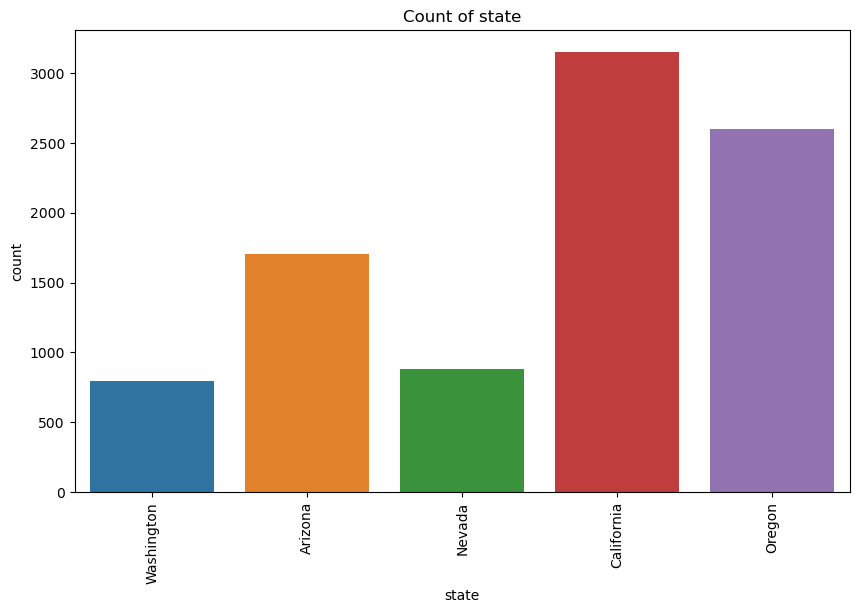

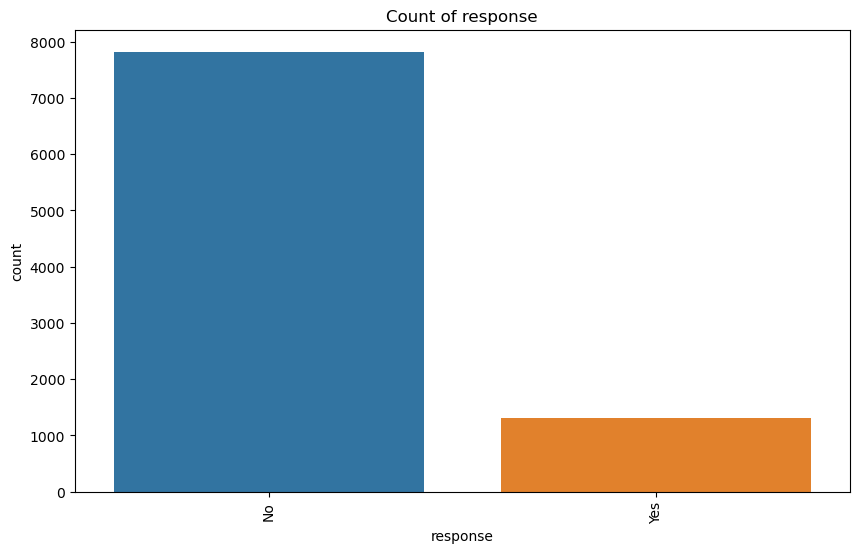

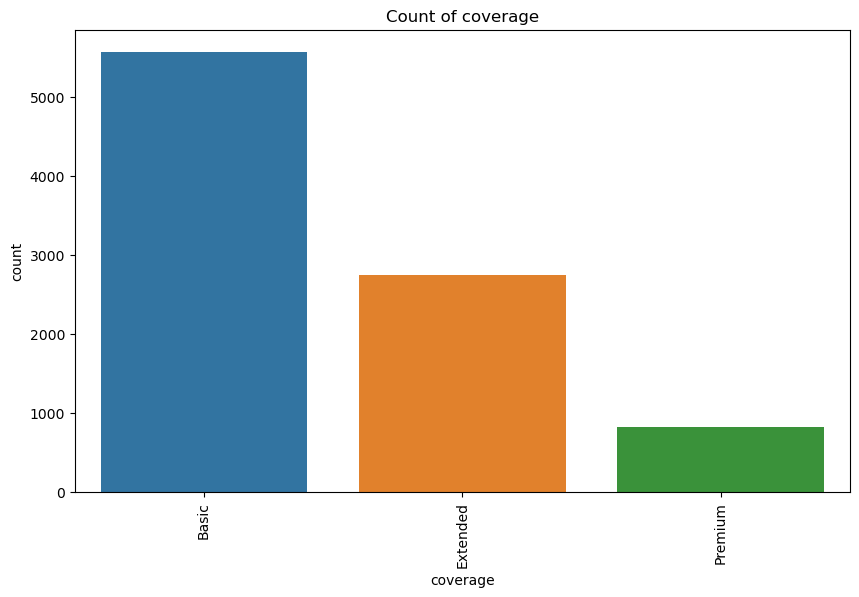

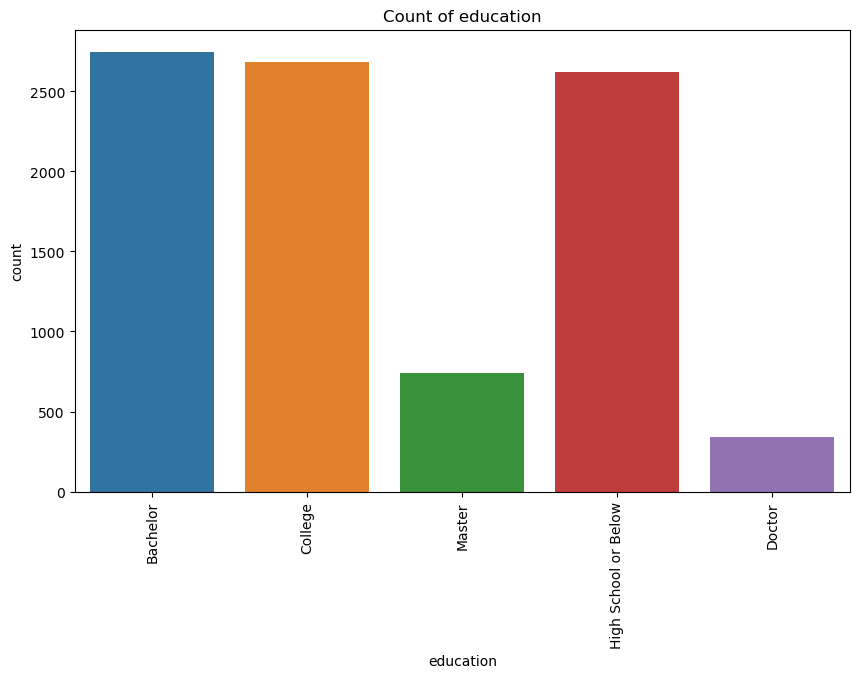

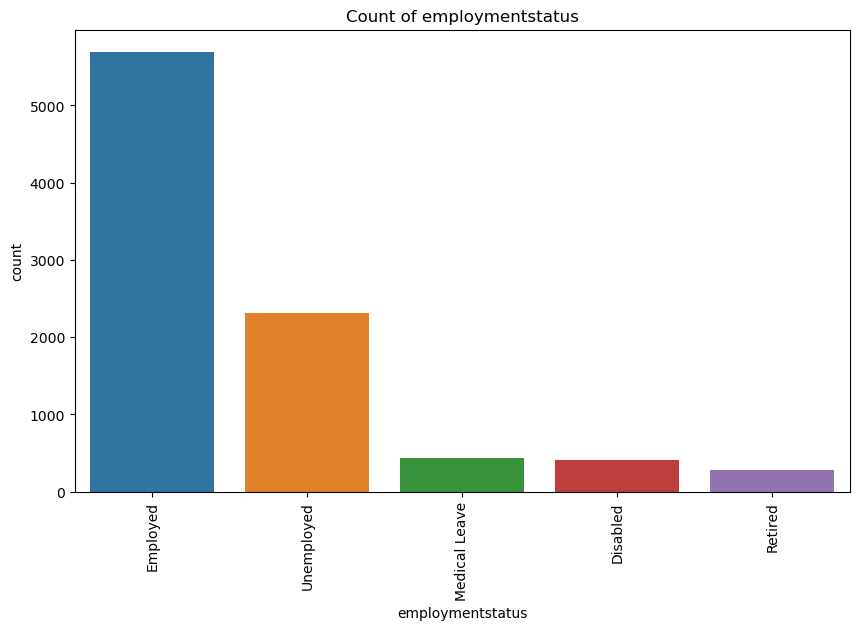

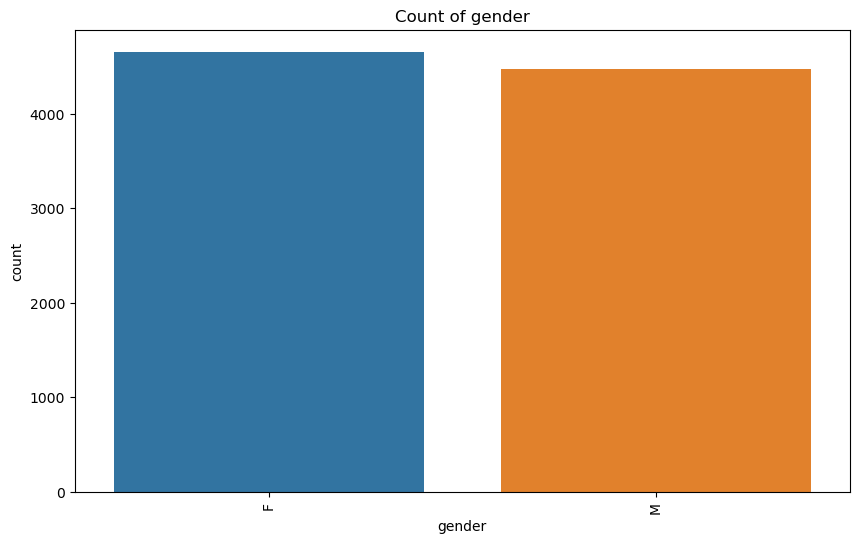

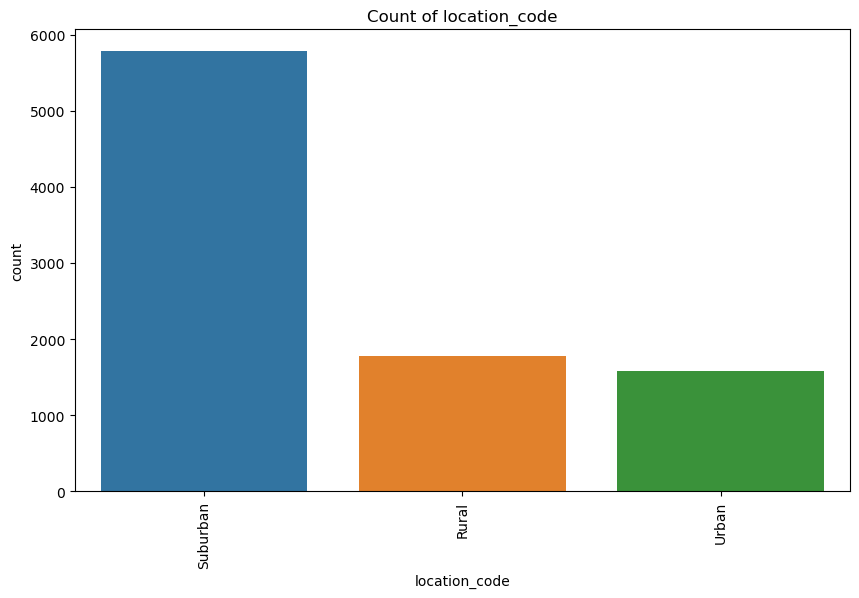

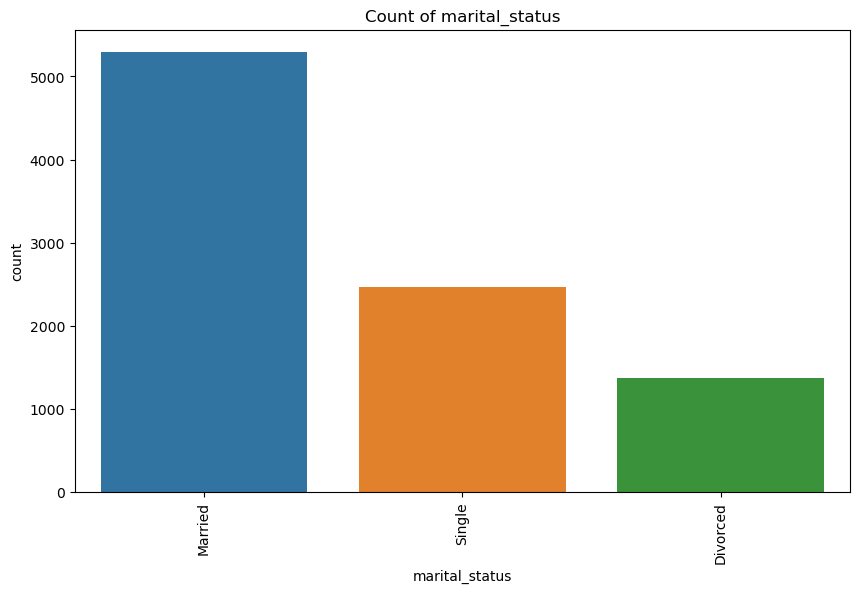

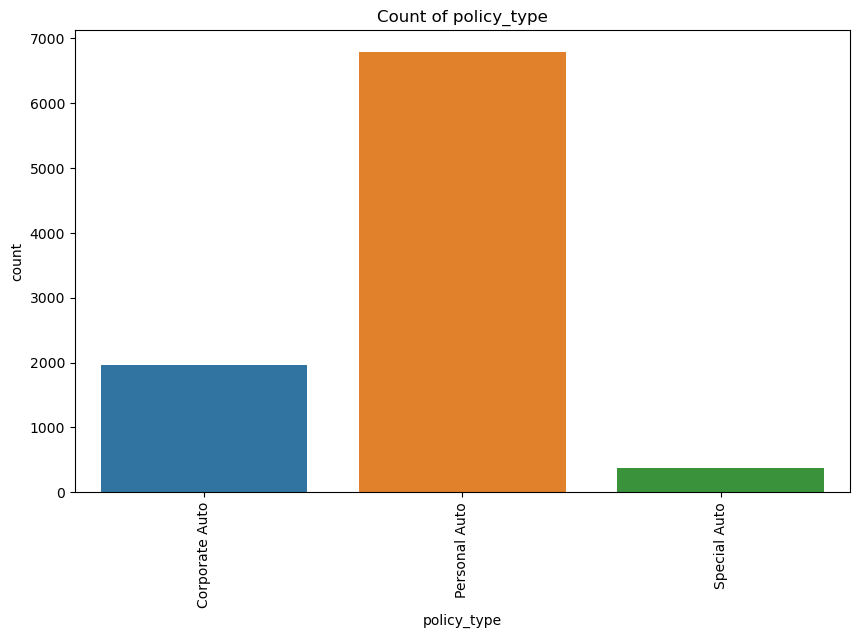

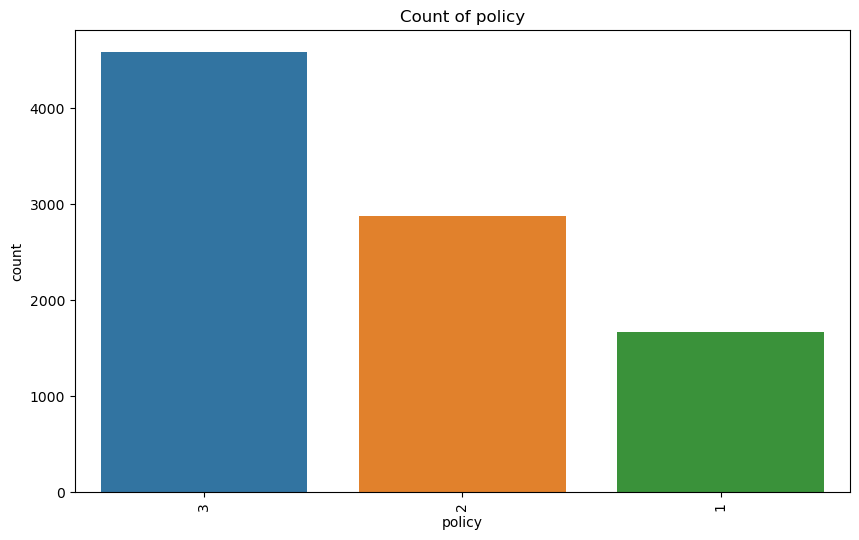

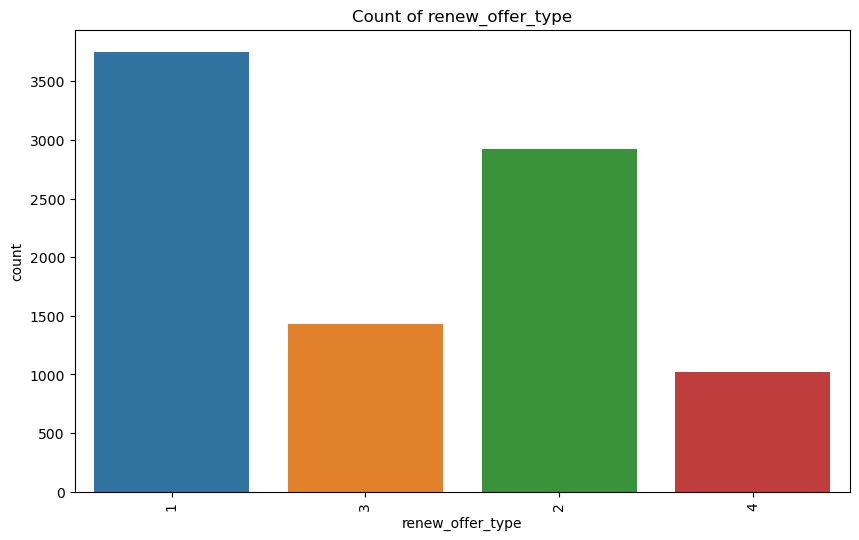

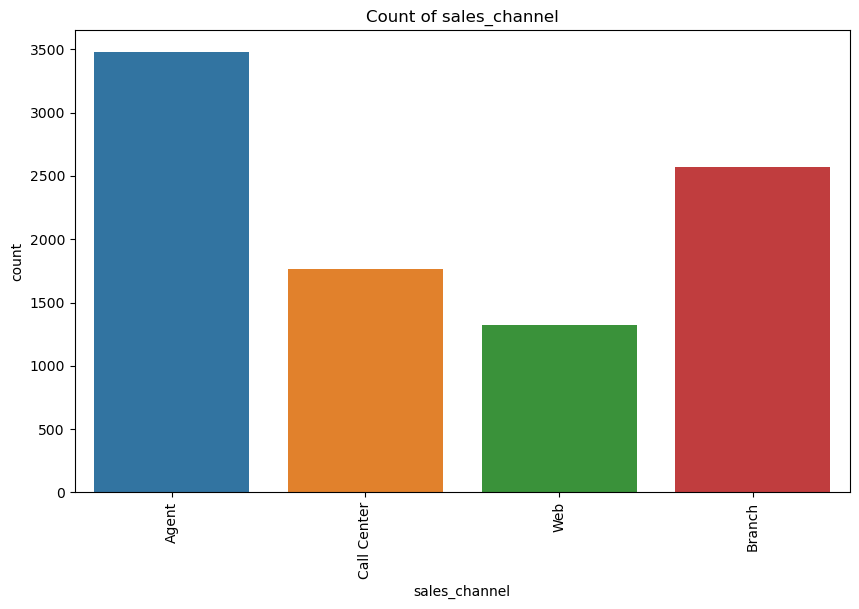

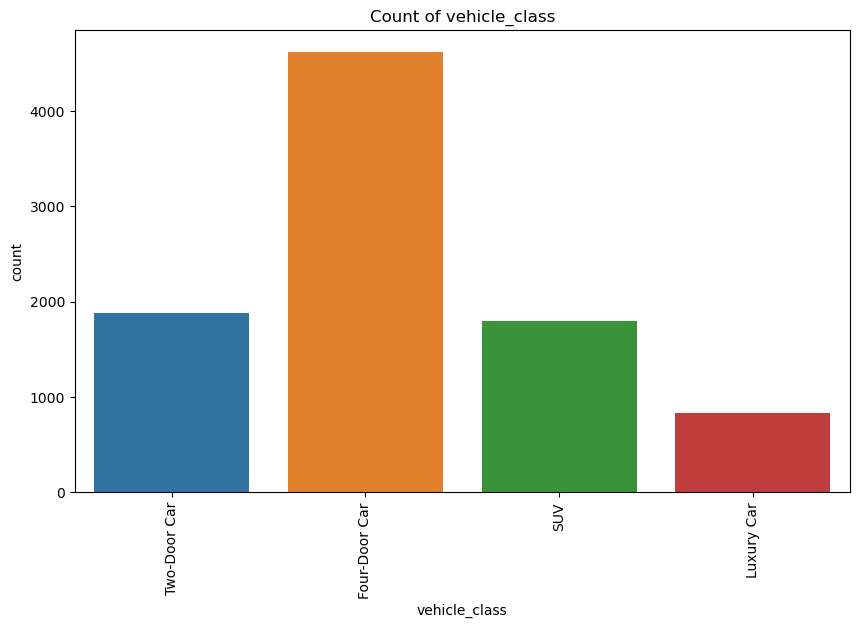

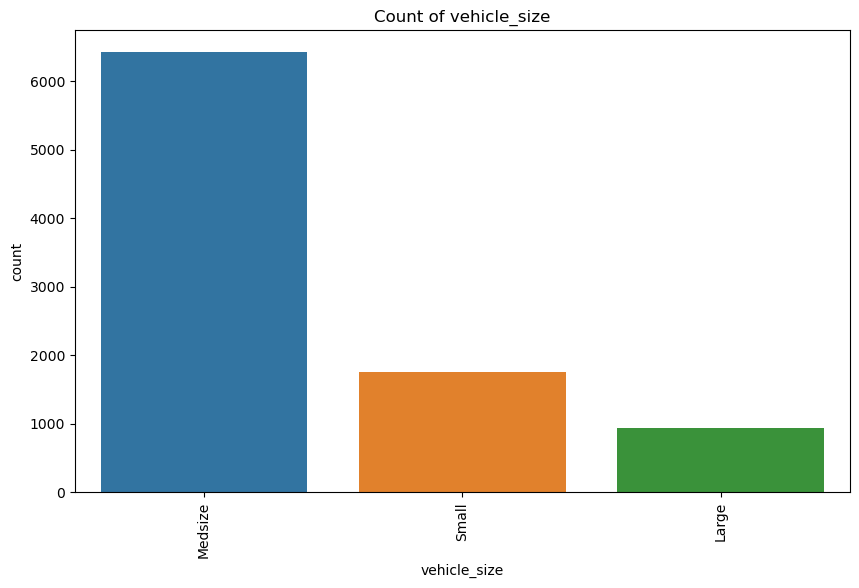

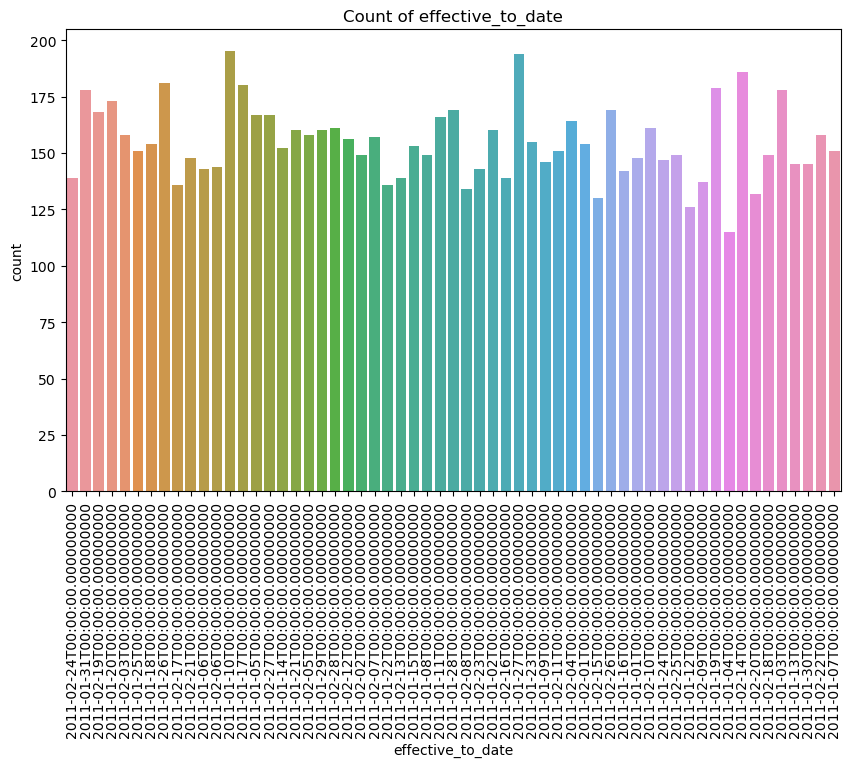

In [44]:
for column in categorical_df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=categorical_df, x=column)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [45]:
#3. should we do with them? Make any changes you feel are necessary.
#I can see that we have some values that we can group

In [46]:
categorical_df['coverage']=categorical_df['coverage'].map({'Basic':0,'Extended':.5, 'Premium':1})

In [47]:
categorical_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [48]:
categorical_df['employmentstatus']=categorical_df['employmentstatus'].map({'Unemployed':0,'Medical Leave':0,'Disabled':0,'Retired':.5,'Employed':1})

In [49]:
categorical_df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [50]:
categorical_df['education']=categorical_df['education'].map({'High School or Below':0,'Bachelor':.5,'College':.5,'Master':1,'Doctor':1})

In [51]:
categorical_df['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [52]:
categorical_df['location_code']=categorical_df['location_code'].map({'Rural':0,'Suburban':.5, 'Urban':1})

In [53]:
categorical_df['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [54]:
categorical_df['vehicle_size']=categorical_df['vehicle_size'].map({'Small':0, 'Medsize':.5, 'Large':1})

In [55]:
categorical_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury Car'], dtype=object)

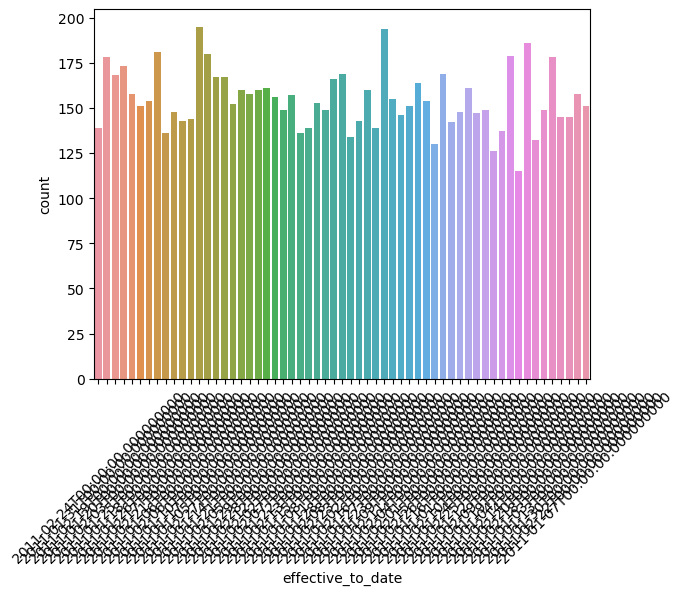

In [56]:
#4. Plot time variable. Can you extract something from it?
sns.countplot(data=categorical_df, x='effective_to_date')
plt.xticks(rotation=45)
plt.show()

#i cant see any information in this plot

In [57]:
#5. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.
categorical_df['day'] = categorical_df['effective_to_date'].dt.day
categorical_df['week'] = categorical_df['effective_to_date'].dt.week
categorical_df['month'] = categorical_df['effective_to_date'].dt.month

categorical_df[['day', 'week', 'month']].head()
categorical_df.head()

C:\Users\jessi\AppData\Local\Temp\ipykernel_13724\4184457701.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  categorical_df['week'] = categorical_df['effective_to_date'].dt.week


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,day,week,month
0,Washington,No,0.0,0.5,1.0,F,0.5,Married,Corporate Auto,3,1,Agent,Two-Door Car,0.5,2011-02-24,24,8,2
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,3,3,Agent,Four-Door Car,0.5,2011-01-31,31,5,1
2,Nevada,No,1.0,0.5,1.0,F,0.5,Married,Personal Auto,3,1,Agent,Two-Door Car,0.5,2011-02-19,19,7,2
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,2,1,Call Center,SUV,0.5,2011-01-20,20,3,1
4,Washington,No,0.0,0.5,1.0,M,0.0,Single,Personal Auto,1,1,Agent,Four-Door Car,0.5,2011-02-03,3,5,2


# Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. Load the cleaned categorical and numerical dataframes that you saved at the end of Monday's labs.

# Instructions

Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

6. Try a simple linear regression with all the data to see whether we are getting good results.

7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

8. Use the function to check LinearRegressor and KNeighborsRegressor.

9. You can check also the MLPRegressor for this task!

10. Check and discuss the results.

In [58]:
import pandas as pd

In [59]:
#numericals_df = numericals_df.drop(columns=['effective_to_date'])
data = pd.concat([numericals_df, categorical_df], axis=1)

X = data.drop(['total_claim_amount'],axis=1)
y = data['total_claim_amount']

In [60]:
#1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [61]:
X_train.shape

(7307, 25)

In [62]:
X_test.shape

(1827, 25)

In [63]:
#2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)


In [64]:
X_train_cat

,state,response,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
7706,California,Yes,F,Divorced,Personal Auto,2,1,Agent,Four-Door Car
779,California,No,F,Married,Personal Auto,1,2,Branch,Four-Door Car
8189,Oregon,No,F,Single,Personal Auto,1,1,Agent,Four-Door Car
1942,Nevada,No,F,Single,Personal Auto,3,4,Branch,Two-Door Car
459,California,No,F,Married,Corporate Auto,3,1,Branch,Two-Door Car
...,...,...,...,...,...,...,...,...,...
350,California,No,F,Married,Personal Auto,3,1,Agent,Four-Door Car
79,California,No,M,Single,Personal Auto,3,2,Branch,Luxury Car
8039,Washington,No,M,Married,Corporate Auto,3,3,Web,Two-Door Car
6936,Oregon,No,F,Married,Personal Auto,3,1,Call Center,Luxury Car


In [65]:
#3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = transformer.transform(X_train_num)
print(X_train_num_scaled.shape)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_train_num_scaled



(7307, 15)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size,day,week,month
0,0.018901,0.258249,0.088608,0.285714,0.696970,0.0,0.000,0.5,0.5,1.0,0.5,0.5,0.833333,0.058824,0.0
1,0.130237,0.792851,0.143460,0.800000,0.616162,0.6,0.125,0.5,0.0,1.0,0.5,0.5,0.400000,0.019608,0.0
2,0.060506,0.136646,0.101266,0.828571,0.373737,0.0,0.250,0.5,0.0,0.0,0.5,0.0,0.433333,0.117647,1.0
3,0.033170,0.663436,0.194093,0.000000,0.747475,0.0,0.000,1.0,0.0,1.0,0.5,1.0,0.366667,0.019608,0.0
4,0.113545,0.157550,0.122363,0.771429,0.373737,0.0,0.125,0.5,0.5,0.0,1.0,1.0,0.500000,0.117647,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.081080,0.238315,0.189873,0.514286,0.777778,0.4,0.250,1.0,0.5,0.0,0.0,0.5,0.066667,0.000000,0.0
7303,0.777937,0.613327,0.527426,0.000000,0.303030,0.2,0.125,0.0,0.5,1.0,0.0,0.0,0.866667,0.137255,1.0
7304,0.050873,0.110991,0.050633,0.742857,0.505051,0.0,0.375,0.0,1.0,0.0,0.5,0.0,0.533333,0.039216,0.0
7305,0.030204,0.232104,0.194093,0.885714,0.606061,0.0,0.000,0.0,0.5,0.0,0.5,1.0,0.400000,0.098039,1.0


In [66]:
X_test_num_scaled = transformer.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)
X_test_num_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size,day,week,month
0,0.044443,0.565978,0.016878,0.114286,0.888889,0.2,0.625,0.0,0.5,1.0,0.5,0.5,0.433333,0.019608,0.0
1,0.041259,0.212400,0.261603,0.085714,0.121212,0.0,0.000,0.5,0.0,1.0,0.0,0.5,0.300000,0.098039,1.0
2,0.049646,0.338874,0.029536,0.314286,0.838384,0.0,1.000,0.0,0.0,1.0,0.0,1.0,0.533333,0.117647,1.0
3,0.024919,0.175603,0.147679,0.171429,0.050505,0.0,0.000,0.5,0.5,0.5,0.5,0.5,0.533333,0.117647,1.0
4,0.093762,0.527270,0.202532,0.142857,0.606061,0.0,0.875,1.0,0.5,1.0,0.0,0.5,0.100000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.007929,0.957152,0.000000,0.457143,0.555556,0.0,0.000,0.0,0.0,1.0,0.0,0.5,0.466667,0.019608,0.0
1823,0.043813,0.897200,0.274262,0.171429,0.545455,0.0,0.000,0.5,0.5,1.0,1.0,0.5,0.766667,0.137255,1.0
1824,0.169999,0.881948,0.037975,0.914286,0.787879,0.0,0.125,0.0,0.0,1.0,0.5,0.5,0.400000,0.098039,1.0
1825,0.030824,0.000000,0.244726,0.571429,0.898990,0.6,0.000,0.0,0.5,0.0,0.5,0.5,0.433333,0.019608,0.0


In [67]:
# 4.Encode the categorical variables X_train_cat
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)  
encoded = encoder.transform(X_train_cat).toarray()
column_names = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_cat_encoded = pd.DataFrame(encoded, columns=column_names)
X_train_cat_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,...,policy_3,renew_offer_type_2,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7304,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7305,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [68]:
# apply Onehot encoding to X_test_cat but don't re-fit
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
onehot_encoded_test = pd.DataFrame(X_test_cat_encoded, columns=cols)
onehot_encoded_test.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,...,policy_3,renew_offer_type_2,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X_test_treated = pd.concat([X_test_num_scaled, onehot_encoded_test], axis=1)
X_test_treated

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,...,policy_3,renew_offer_type_2,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.044443,0.565978,0.016878,0.114286,0.888889,0.2,0.625,0.0,0.5,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.041259,0.212400,0.261603,0.085714,0.121212,0.0,0.000,0.5,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.049646,0.338874,0.029536,0.314286,0.838384,0.0,1.000,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.024919,0.175603,0.147679,0.171429,0.050505,0.0,0.000,0.5,0.5,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.093762,0.527270,0.202532,0.142857,0.606061,0.0,0.875,1.0,0.5,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.007929,0.957152,0.000000,0.457143,0.555556,0.0,0.000,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1823,0.043813,0.897200,0.274262,0.171429,0.545455,0.0,0.000,0.5,0.5,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1824,0.169999,0.881948,0.037975,0.914286,0.787879,0.0,0.125,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1825,0.030824,0.000000,0.244726,0.571429,0.898990,0.6,0.000,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [70]:
X_train_transformed = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_train_transformed

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,...,policy_3,renew_offer_type_2,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.018901,0.258249,0.088608,0.285714,0.696970,0.0,0.000,0.5,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.130237,0.792851,0.143460,0.800000,0.616162,0.6,0.125,0.5,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.060506,0.136646,0.101266,0.828571,0.373737,0.0,0.250,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.033170,0.663436,0.194093,0.000000,0.747475,0.0,0.000,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.113545,0.157550,0.122363,0.771429,0.373737,0.0,0.125,0.5,0.5,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.081080,0.238315,0.189873,0.514286,0.777778,0.4,0.250,1.0,0.5,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,0.777937,0.613327,0.527426,0.000000,0.303030,0.2,0.125,0.0,0.5,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7304,0.050873,0.110991,0.050633,0.742857,0.505051,0.0,0.375,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7305,0.030204,0.232104,0.194093,0.885714,0.606061,0.0,0.000,0.0,0.5,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [71]:
#5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
data_types = data.dtypes
data_types

customer_lifetime_value                 float64
income                                    int64
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
total_claim_amount                      float64
state                                    object
response                                 object
coverage                                float64
education                               float64
employmentstatus                        float64
gender                                   object
location_code                           float64
marital_status                           object
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
vehicle_class                           

In [72]:
#6. Try a simple linear regression with all the data to see whether we are getting good results.
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train_num_scaled, y_train)

LinearRegression()

In [73]:
list(X_train_cat.columns)==list(X_test_cat.columns)

True

In [74]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train_num_scaled)
r2_score(y_train, predictions)

0.6064324303831643

In [75]:
predictions_test = lm.predict(X_test_num_scaled)
r2_score(y_test, predictions_test)

0.5844262030122355

In [76]:
#7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

# Define the models
models_to_try = [
    #lm, KNeighborsRegressor(), MLPRegressor(random_state=1, max_iter=1000),
    #DecisionTreeRegressor(), RandomForestRegressor()
]

# Define a function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)
    return scores

# Call the function and evaluate the models
scores = train_and_evaluate_models(models_to_try, X_train_transformed, y_train, X_test_treated, y_test)

# Print the results for each model
for model, score in zip(models_to_try, scores):
    model_name = model.__class__.__name__
    print(f'Model: {model_name}, R^2 Score: {score:.4f}')

In [77]:
#8. Use the function to check LinearRegressor and KNeighborsRegressor.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


models_to_try = [lm, KNeighborsRegressor()]

# Define a function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)
    return scores

# Call the function and evaluate the models
scores = train_and_evaluate_models(models_to_try, X_train_transformed, y_train, X_test_treated, y_test)

# Print the results for each model
for model, score in zip(models_to_try, scores):
    model_name = model.__class__.__name__
    print(f'Model: {model_name}, R^2 Score: {score:.4f}')

Model: LinearRegression, R^2 Score: 0.6111
Model: KNeighborsRegressor, R^2 Score: 0.4899


In [78]:
# 9.You can check also the MLPRegressor for this task!
models_to_try = [ MLPRegressor(random_state=1, max_iter=2000)]

# Define a function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)
    return scores

# Call the function and evaluate the models
scores = train_and_evaluate_models(models_to_try, X_train_transformed, y_train, X_test_treated, y_test)

# Print the results for each model
for model, score in zip(models_to_try, scores):
    model_name = model.__class__.__name__
    print(f'Model: {model_name}, R^2 Score: {score:.4f}')

Model: MLPRegressor, R^2 Score: 0.8272


In [79]:
#10. Check and discuss the results.
#The score from KNeighborsRegressor is lower than the Linear Regression model. This means that the KNN model migth not be right for this dataset
#The LinearRegressor model had the best results, so it would be the better option for this dataset.

# Lab | Random variable distributions

Refer to the numerical.csv dataset that you previously saved.

# Instructions

1. Use the numerical variables from our dataset this week.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [80]:
#1. Use the numerical variables from our dataset this week.
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('numerical.csv')

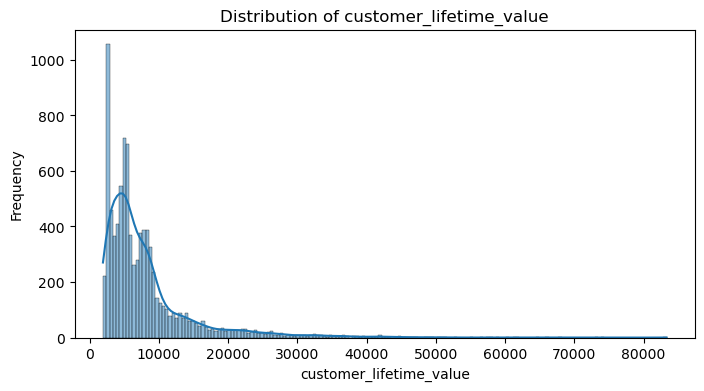

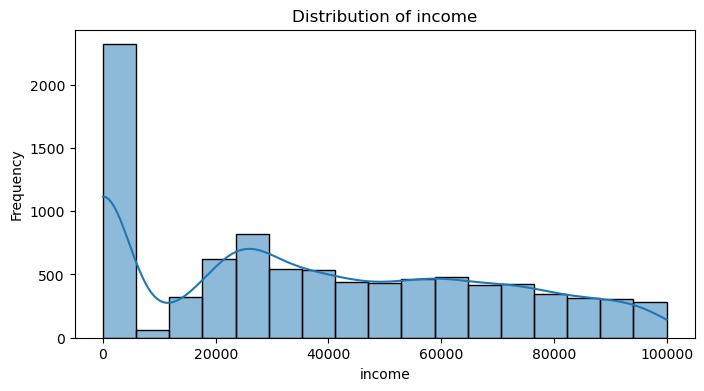

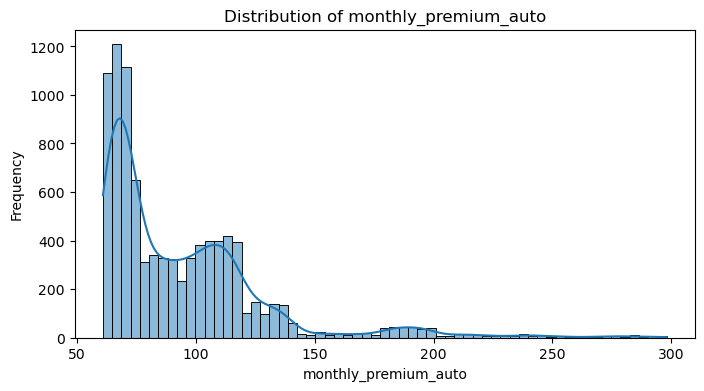

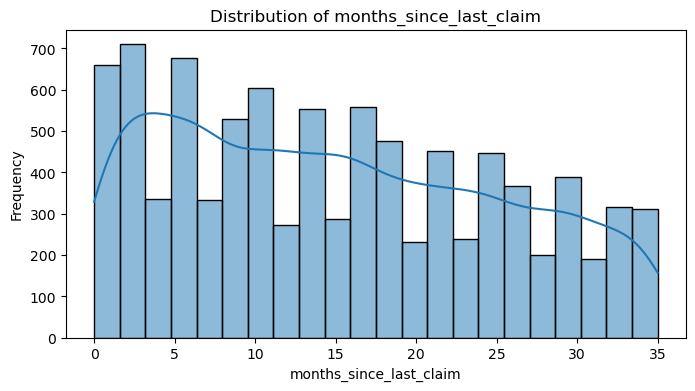

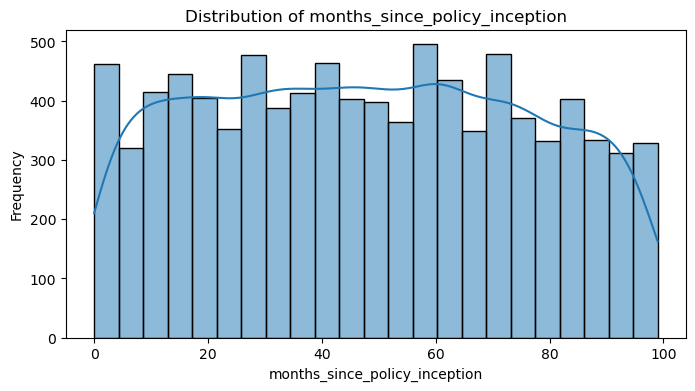

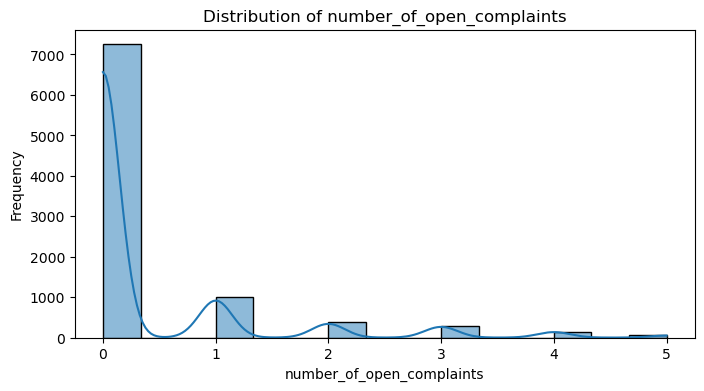

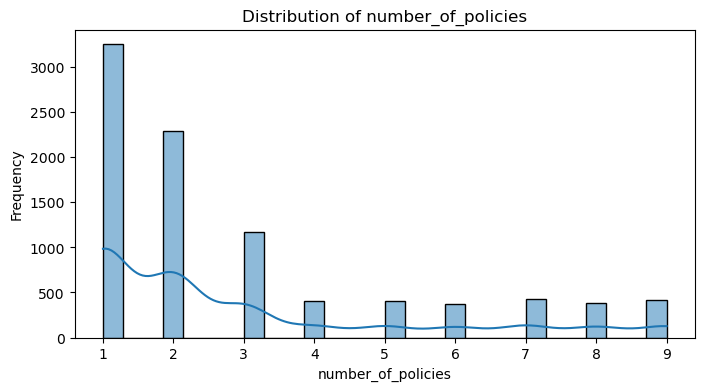

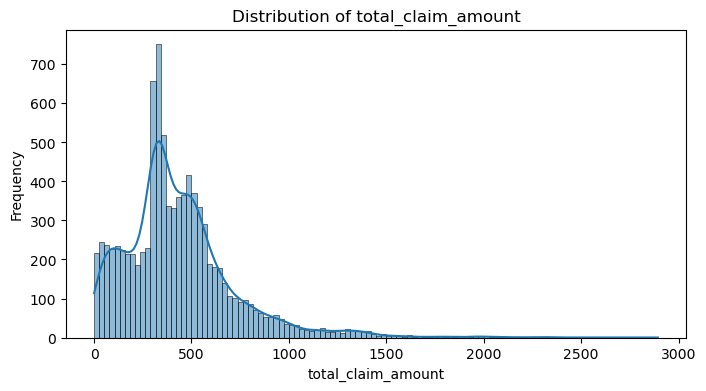

In [81]:
#2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

# Plot histograms for each variable to check if they follow a normal or exponential distribution
for column in numericals_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numericals_df[column], kde=True)  # You can use 'kde=False' to hide the kernel density estimate
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [82]:
#the only graph that has a normal distribution is perhaps the first

In [83]:
#3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.
import numpy as np

transformed_variable = np.log(numericals_df)
transformed_variable

C:\Users\jessi\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,-inf,0.000000,5.952753
1,8.850738,-inf,4.543295,2.564949,3.737670,-inf,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,-inf,0.693147,6.339428
3,8.941920,-inf,4.663439,2.890372,4.174387,-inf,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,-inf,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,-inf,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,-inf,0.000000,5.938064
9131,9.007476,-inf,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,-inf,1.098612,6.538429


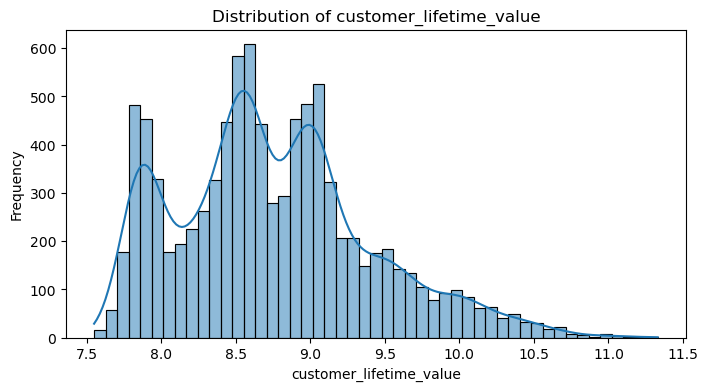

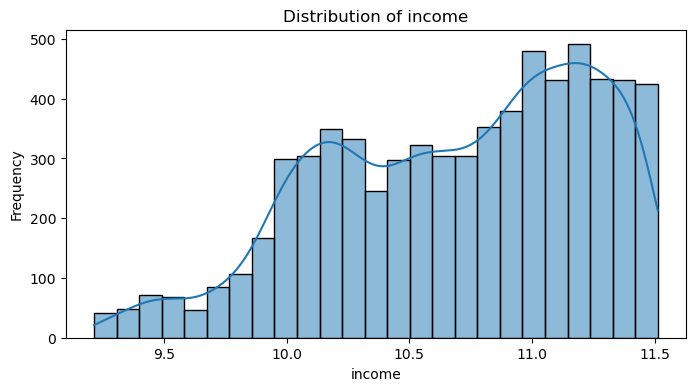

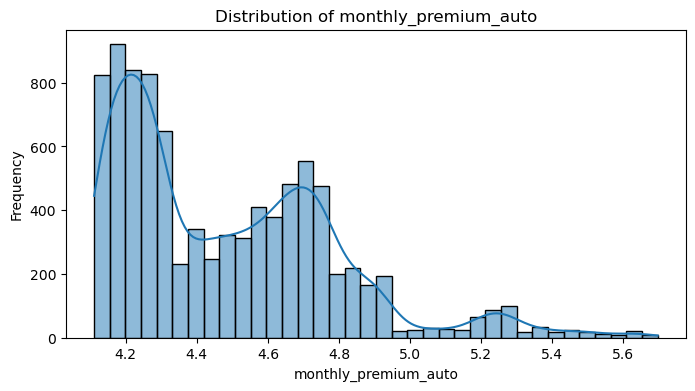

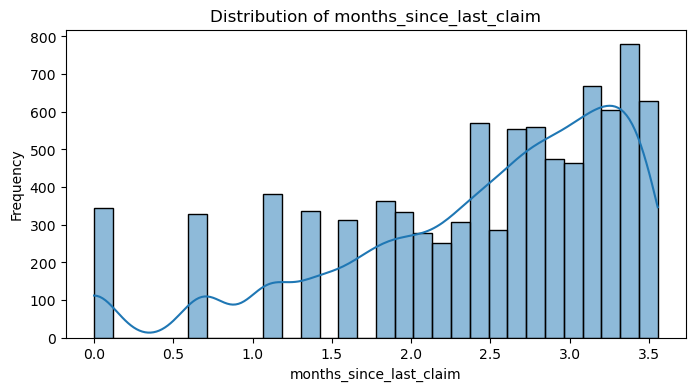

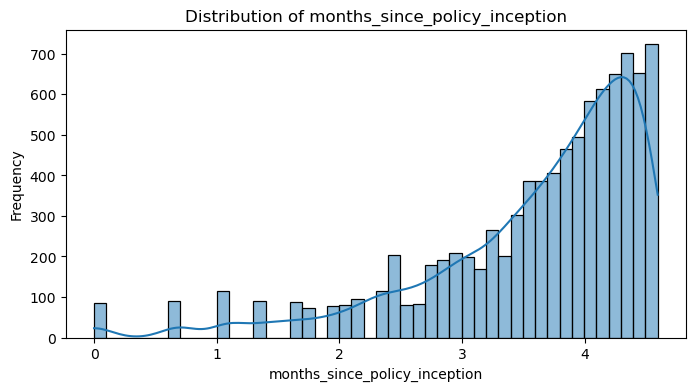

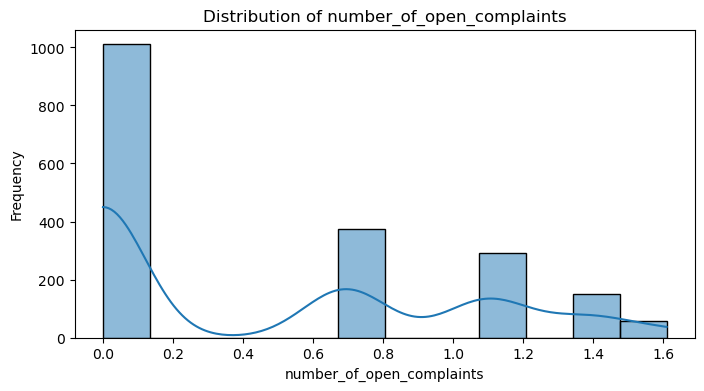

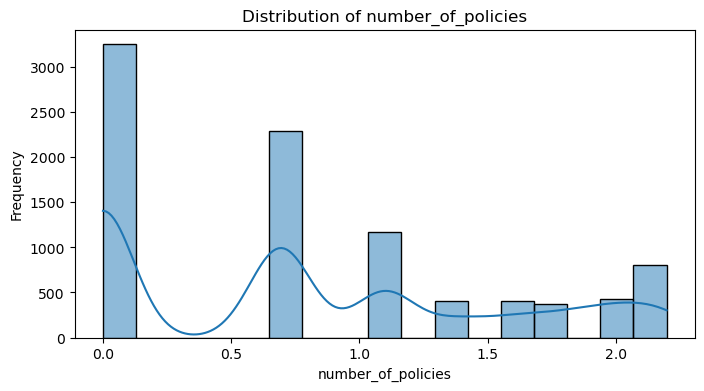

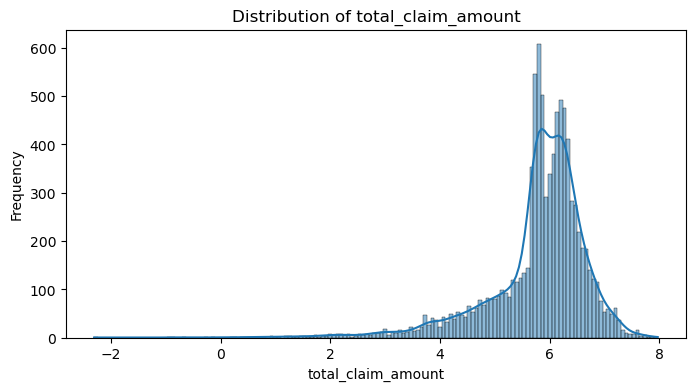

In [84]:
for column in numericals_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(transformed_variable[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [85]:
#we can se that in the months_since_policy_inception the plot is better but but in others the shape was worse with log-transform